In [14]:
from matplotlib import colors
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from pandas.core.indexes import category

In [15]:
data = pd.read_csv(r'C:\\Users\\azili\\OneDrive\\Documents\\Netflix_project\\Clean_Data.csv', index_col= 'show_id')
df = DataFrame(data)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,
1,TV Show,A Little Thing Called First Love,NaN,"Lai Kuan-lin, Zhao Jinmai, Wang Runze, Chai We...",China,"October 26, 2019",2019,TV-G,1 Season,"Romantic TV Shows, Teen TV Shows",A shy college student with a knack for drawing...
2,TV Show,A Love So Beautiful,NaN,"Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong J...",South Korea,"December 28, 2020",2020,TV-PG,1 Season,"Romantic TV Shows, TV Comedies",Love is as tough as it is sweet for a lovestru...
3,Movie,A Love Song for Latasha,Sophia Nahli Allison,NaN,United States,"September 21, 2020",2020,TV-PG,20 min,Documentaries,The killing of Latasha Harlins became a flashp...
4,Movie,A Love Story,Maryo J. De los Reyes,"Maricel Soriano, Aga Muhlach, Angelica Pangani...",Philippines,"March 14, 2019",2007,TV-14,117 min,"Dramas, International Movies, Romantic Movies",Self-made millionaire Ian thinks he's found ha...
5,TV Show,A Man Called God,NaN,"Song Il-gook, Han Chae-young, Kim Min-jong, Go...",South Korea,"March 12, 2019",2010,TV-14,1 Season,"Crime TV Shows, Korean TV Shows","Raised in America, government agent Choi Kang-..."


In [16]:
# Create a date culoumn based on existed column 'date_added'.
# extract year, month and weekday and add these as new culomns:
date = pd.to_datetime(data['date_added'])
data['date'] = date
data['year'] = df['date'].dt.year.astype('Int64')
data['month'] = df['date'].dt.month.astype('Int64')
data['weekday'] = df['date'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,date,year,month,weekday
show_id,,,,,,,,,,,,,,,
1,TV Show,A Little Thing Called First Love,NaN,"Lai Kuan-lin, Zhao Jinmai, Wang Runze, Chai We...",China,"October 26, 2019",2019,TV-G,1 Season,"Romantic TV Shows, Teen TV Shows",A shy college student with a knack for drawing...,2019-10-26,2019,10,Saturday
2,TV Show,A Love So Beautiful,NaN,"Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong J...",South Korea,"December 28, 2020",2020,TV-PG,1 Season,"Romantic TV Shows, TV Comedies",Love is as tough as it is sweet for a lovestru...,2020-12-28,2020,12,Monday
3,Movie,A Love Song for Latasha,Sophia Nahli Allison,NaN,United States,"September 21, 2020",2020,TV-PG,20 min,Documentaries,The killing of Latasha Harlins became a flashp...,2020-09-21,2020,9,Monday
4,Movie,A Love Story,Maryo J. De los Reyes,"Maricel Soriano, Aga Muhlach, Angelica Pangani...",Philippines,"March 14, 2019",2007,TV-14,117 min,"Dramas, International Movies, Romantic Movies",Self-made millionaire Ian thinks he's found ha...,2019-03-14,2019,3,Thursday
5,TV Show,A Man Called God,NaN,"Song Il-gook, Han Chae-young, Kim Min-jong, Go...",South Korea,"March 12, 2019",2010,TV-14,1 Season,"Crime TV Shows, Korean TV Shows","Raised in America, government agent Choi Kang-...",2019-03-12,2019,3,Tuesday


In [17]:
# group by years, months and weekdays:
by_years = data.groupby(['year']).size()
by_months = data.groupby(['month']).size()
by_weekday = data.groupby(['weekday']).size()

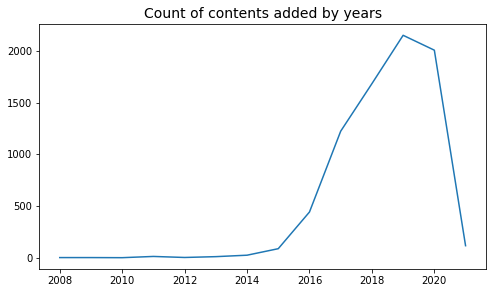

In [18]:
# Figuer 1.1: number of contents adding
plt.figure(figsize=(8, 4.5))
plt.plot(by_years)
plt.title('Count of contents added by years', fontsize=14)
plt.show()

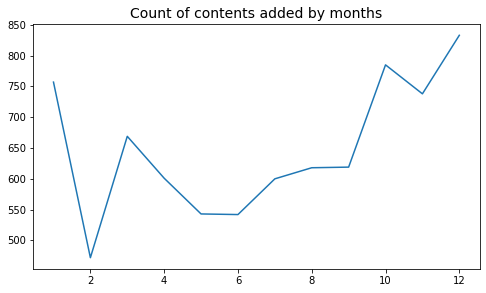

In [19]:
# Figuer 1.2:
plt.figure(figsize=(8, 4.5))
plt.plot(by_months)
plt.title('Count of contents added by months', fontsize=14)

plt.show()

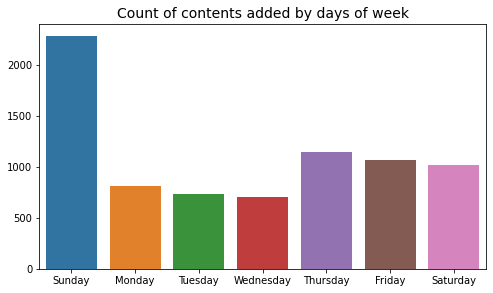

In [20]:
# Figuer 1.3:
sorted_weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['weekday'] = pd.Categorical(data['weekday'], categories=sorted_weekdays, ordered=True)
df = df.sort_values('weekday')
plt.figure(figsize=(8, 4.5))
colors_2 = ['#5F9EA0', '#DEB887', '#A9A9A9', '#B8860B', '#8B008B', '#20B2AA', '#3CB371']
sns.barplot(x=sorted_weekdays, y=by_weekday)
plt.title('Count of contents added by days of week', fontsize=14)
plt.show()


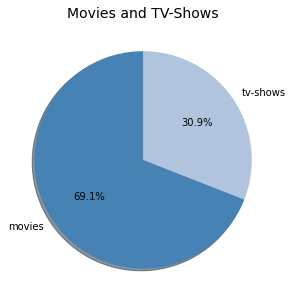

In [21]:
# Figuer 2.1:
movies = data[(data['type']=='Movie')]
tv_shows = data[(data['type']=='TV Show')]
a = np.array([len(movies), len(tv_shows)])
mylabels = ['movies', 'tv-shows']
mycolors = ['#4682B4', '#B0C4DE']
plt.figure(figsize=(8, 5))
plt.pie(a, labels= mylabels, startangle= 90, shadow = True, colors= mycolors, autopct='%1.1f%%')
plt.title('Movies and TV-Shows', fontsize=14)
plt.show()

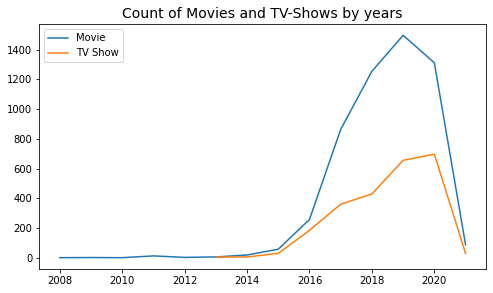

In [22]:
# Figuer 2.2:

type_per_year = data.groupby(by=['year', 'type']).size()
#type_per_year.unstack()
plt.figure(figsize=(8, 4.5))
plt.plot(type_per_year.unstack())
plt.title('Count of Movies and TV-Shows by years', fontsize=14)
plt.legend(type_per_year.unstack())
plt.show()



In [23]:
# Top 10 Countries:
by_country = data.groupby(['country']).size()
top_10= by_country.sort_values(ascending=False).head(10)
top_10_df = pd.DataFrame(top_10)
top_10_df

,0
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


In [42]:
# Figuer 3:
map

map

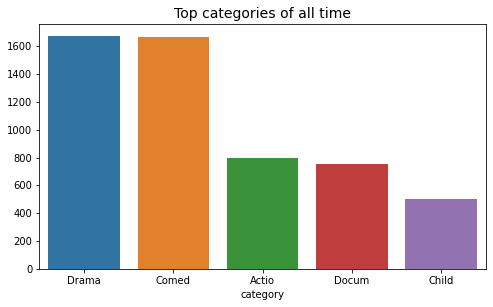

In [ ]:
# Figuer 4:
data['category'] = df.category.str[0:5]
by_category = data.groupby(by=['category']).size()
top_5_cats = by_category.sort_values(ascending= False).head(5)
plt.figure(figsize=(8, 4.5))
sns.barplot(x=top_5_cats.index, y=top_5_cats)
plt.title('Top categories of all time', fontsize=14)
plt.show()